In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from lib.correlation_analysis import *

# 概要

データ分析に取り組むにあたり，2系統のデータの関係性を表現する「相関分析」と「因果分析」について説明する．

* 相関分析：2系統のデータの変化がどれだけ近いかを示す
* 因果分析：2系統のデータが原因と結果の関係にあるかを示す


## 相関分析

相関分析は2系統のデータの変化の近さを記述する分析手法で，大別すると，

* 間隔尺度・比率尺度のデータに対して行うピアソンの積率相関分析
* 順序尺度のデータに対して行うスピアマンの順位相関分析，ケンドールの順位相関分析

の3つがある．  
スピアマンの順位相関分析とケンドールの順位相関分析の計算方法の違いについて，詳細は後述するが，スピアマンの順位相関分析は各系統のデータから計算する順位をもとに計算するのに対し，ケンドールの順位相関分析はデータペアの大小関係に+1または-1の付与を行いこの個数から計算するという違いがある．

### ピアソンの積率相関分析

2系統のデータ(変数$x$, 変数$y$)に対する直線的な関係性を数値で示す分析．

* 変数$x$の値が大きいほど，変数$y$の値も大きい場合 … 正の相関関係
* 変数$x$の値が大きいほど，変数$y$の値が小さい場合 … 負の相関関係
* 変数$x$の値と変数$y$の値に直線関係が成立しない場合 … 無相関

相関関係は相関係数$r$で表され，$-1 \le r \le +1$の範囲の値を持つ．
相関係数$r$は2変数間の線形関係の強さを表し，下記のように計算される．

$$
    r = \frac{\Sigma(x - \bar{x})(y - \bar{y})}{\sqrt{\Sigma(x - \bar{x})^2\Sigma(y - \bar{y})^2}}
$$


計算された相関係数の値は下記のように判断する．

| $r$ | 相関の強さ |
|:---- |:---- |
| $0$ | 相関なし |
| $$0 \lt |r| \le 0.2$$ | ほとんど相関なし|
| $$0.2 \lt |r| \le 0.4$$ | 低い相関あり |
| $$0.4 \lt |r| \le 0.7$$ | 相関あり |
| $$0.7 \lt |r| \lt 1.0$$ | 高い相関あり |
| $1.0$ または $-1.0$ | 完全な相関 |

ピアソンの積率相関係数は[NumPyのcorrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)モジュールを用いて算出することができる．  
2変数$(x, y)$の相関係数を$r_{xy}$とすると，corrcoefモジュールの戻り値は$r=[[r_{xx}, r_{xy}], [r_{yx}, r_{yy}]]$であり，通常，2変数間の相関係数を取得する場合は戻り値$r[0, 1]$を参照する．

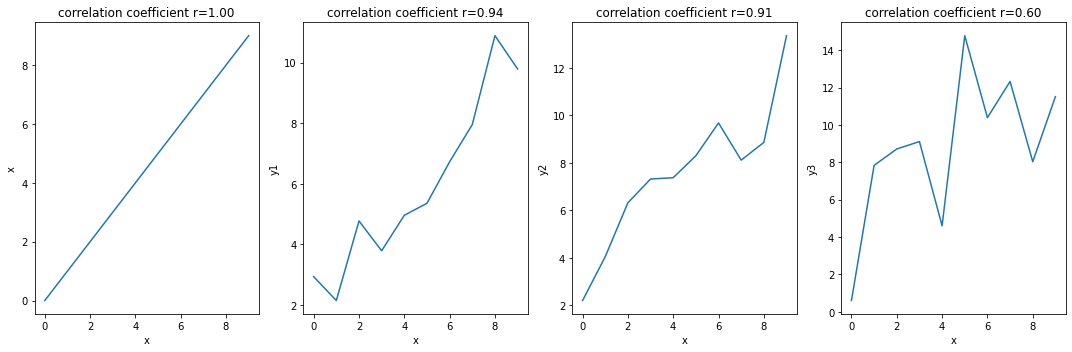

In [2]:
x = np.array([i for i in range(10)])
rng = np.random.default_rng(seed=1234)
y1 = x + (rng.random(10) * 3)
y2 = x + (rng.random(10) * 5)
y3 = x + (rng.random(10) * 10)

fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_xlabel("x")
ax1.set_ylabel("x")
ax1.set_title("correlation coefficient r={:.2f}".format(np.corrcoef(x, x)[0, 1]))
ax1.plot(x, x)

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y1")
ax2.set_title("correlation coefficient r={:.2f}".format(np.corrcoef(x, y1)[0, 1]))
ax2.plot(x, y1)

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_xlabel("x")
ax3.set_ylabel("y2")
ax3.set_title("correlation coefficient r={:.2f}".format(np.corrcoef(x, y2)[0, 1]))
ax3.plot(x, y2)

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_xlabel("x")
ax4.set_ylabel("y3")
ax4.set_title("correlation coefficient r={:.2f}".format(np.corrcoef(x, y3)[0, 1]))
ax4.plot(x, y3)

plt.tight_layout()
plt.show()

plt.close()

なお，corrcoefモジュールではベクトル間の相関関係の分析は可能だが，多次元空間上にプロットされるデータ群間の相関関係を分析することはできない．  
corrcoefモジュールの引数$x, y$を各々2Dで指定することは可能だが，下記に示す出力が得られ，各引数のベクトル成分間の相関係数が出力される．  
デフォルトは行ベクトルを変数とみなして計算され(rowvar=True)，rowvar=Falseとすると列ベクトルを変数とみなして計算される．

![corrcoef_2d](./figure/corrcoef_2d.png)

In [3]:
rng = np.random.default_rng(seed=1234)
x = rng.random([3, 3])
y = rng.random([3, 3])
print(np.corrcoef(x, y))

[[ 1.         -0.66195736  0.33878786 -0.09508357 -0.42879307 -0.54801698]
 [-0.66195736  1.         -0.92947882 -0.68320427  0.96098057  0.98973076]
 [ 0.33878786 -0.92947882  1.          0.90438686 -0.9952479  -0.97266237]
 [-0.09508357 -0.68320427  0.90438686  1.         -0.85853851 -0.78057001]
 [-0.42879307  0.96098057 -0.9952479  -0.85853851  1.          0.99065265]
 [-0.54801698  0.98973076 -0.97266237 -0.78057001  0.99065265  1.        ]]


$r_{xx}$

In [4]:
print([peason(x[0], x[i]) for i in range(3)])
print([peason(x[1], x[i]) for i in range(3)])
print([peason(x[2], x[i]) for i in range(3)])

[1.0, -0.661957360012262, 0.3387878561769984]
[-0.661957360012262, 1.0, -0.9294788171489377]
[0.3387878561769984, -0.9294788171489377, 1.0]


$r_{xy}$

In [5]:
print([peason(x[0], y[i]) for i in range(3)])
print([peason(x[1], y[i]) for i in range(3)])
print([peason(x[2], y[i]) for i in range(3)])

[-0.0950835718169372, -0.4287930685884265, -0.5480169794484697]
[-0.6832042728525581, 0.9609805658651692, 0.9897307550853374]
[0.9043868568391978, -0.995247903087473, -0.9726623682890067]


$r_{yx}$

In [6]:
print([peason(y[0], x[i]) for i in range(3)])
print([peason(y[1], x[i]) for i in range(3)])
print([peason(y[2], x[i]) for i in range(3)])

[-0.0950835718169372, -0.6832042728525581, 0.9043868568391978]
[-0.4287930685884265, 0.9609805658651692, -0.995247903087473]
[-0.5480169794484697, 0.9897307550853374, -0.9726623682890067]


$r_{yy}$

In [7]:
print([peason(y[0], y[i]) for i in range(3)])
print([peason(y[1], y[i]) for i in range(3)])
print([peason(y[2], y[i]) for i in range(3)])

[1.0, -0.858538507357436, -0.7805700088956775]
[-0.858538507357436, 1.0, 0.990652647058358]
[-0.7805700088956775, 0.990652647058358, 1.0]


### スピアマンの順位相関分析

2系統のデータ(変数$x$, 変数$y$)の大小関係から計算する順位を用いて関係性を示す分析．  
算出式はピアソンの積率相関係数と同じ，
$$
r = \frac{\Sigma(x - \bar{x})(y - \bar{y})}{\sqrt{\Sigma(x - \bar{x})^2\Sigma(y - \bar{y})^2}}
$$
である．

$x$と$y$が順位を示す自然数である為，総和の公式より，
$$
\begin{eqnarray*}
\Sigma{x} &=& \Sigma{y} &=& \frac{n(n+1)}{2} \\
\Sigma{x^2} &=& \Sigma{y^2} &=& \frac{n(n+1)(2n+1)}{6}
\end{eqnarray*}
$$
であり，平均は，
$$
\begin{eqnarray*}
\bar{x} = \bar{y} = \frac{n+1}{2}
\end{eqnarray*}
$$
である．これらを用いて，ピアソンの積率相関係数を変形する．

$$
\begin{eqnarray*}
(分母) &=& \sqrt{\Sigma(x - \bar{x})^2\Sigma(y - \bar{y})^2} \\
&=& \sqrt{(\Sigma{x^2}-2\Sigma{x\bar{x}}+\Sigma{\bar{x}^2})(\Sigma{y^2}-2\Sigma{y\bar{y}}+\Sigma{\bar{y}^2})} \\
&=& \sqrt{(\frac{n(n+1)(2n+1)}{6}-2\bullet\frac{n(n+1)}{2}\bullet\frac{n+1}{2}+n\bullet(\frac{n+1}{2})^2)(\frac{n(n+1)(2n+1)}{6}-2\bullet\frac{n(n+1)}{2}\bullet\frac{n+1}{2}+n\bullet(\frac{n+1}{2})^2)} \\
&=& \frac{n(n+1)(2n+1)}{6}-2\bullet\frac{n(n+1)}{2}\bullet\frac{n+1}{2}+n\bullet(\frac{n+1}{2})^2 \\
&=& \frac{n(n+1)(2n+1)}{6}+\frac{-2n(n+1)^2+n(n+1)^2}{4} \\
&=& \frac{n(n+1)(2n+1)}{6}+\frac{-n(n+1)^2}{4} \\
&=& \frac{n(n+1)}{12}\bullet(4n+2-3n-3) \\
&=& \frac{n(n+1)(n-1)}{12} \\
(分子) &=& \Sigma(x - \bar{x})(y - \bar{y}) \\
&=& \sqrt{\Sigma{(x-\bar{x})^2}\Sigma{(y-\bar{y})^2}}-\sqrt{\Sigma{(x-\bar{x})^2}\Sigma{(y-\bar{y})^2}}+\Sigma(x - \bar{x})(y - \bar{y}) \\
&=& \frac{n(n+1)(n-1)}{12}-\Sigma{(x-\bar{x})^2}+\Sigma(x - \bar{x})(y - \bar{y}) \\
&=& \frac{n(n+1)(n-1)}{12}-\frac{\Sigma{(x-\bar{x})^2}}{2}-\frac{\Sigma{(y-\bar{y})^2}}{2}+\Sigma(x - \bar{x})(y - \bar{y}) \\
&=& \frac{n(n+1)(n-1)}{12}-\frac{1}{2}(\Sigma{(x-\bar{x})^2}+\Sigma{(y-\bar{y})^2}+2\Sigma(x - \bar{x})(y - \bar{y})) \\
&=& \frac{n(n+1)(n-1)}{12}-\frac{1}{2}\Sigma{((x-\bar{x})-(y-\bar{y}))^2} \\
&=& \frac{n(n+1)(n-1)}{12}-\frac{1}{2}\Sigma{(x-y)^2} \\
&=& \frac{n(n+1)(n-1)-6\Sigma{(x-y)^2}}{12} \\
\because \frac{\Sigma(x - \bar{x})(y - \bar{y})}{\sqrt{\Sigma(x - \bar{x})^2\Sigma(y - \bar{y})^2}} &=& \frac{\frac{n(n+1)(n-1)-6\Sigma{(x-y)^2}}{12}}{\frac{n(n+1)(n-1)}{12}} \\
&=& 1-\frac{6\Sigma(x-y)^2}{n(n+1)(n-1)}
\end{eqnarray*}
$$


スピアマンの順位相関係数は記号$\rho$で表し，
$$
\rho = 1-\frac{6\Sigma(x-y)^2}{n(n+1)(n-1)}
$$
である．

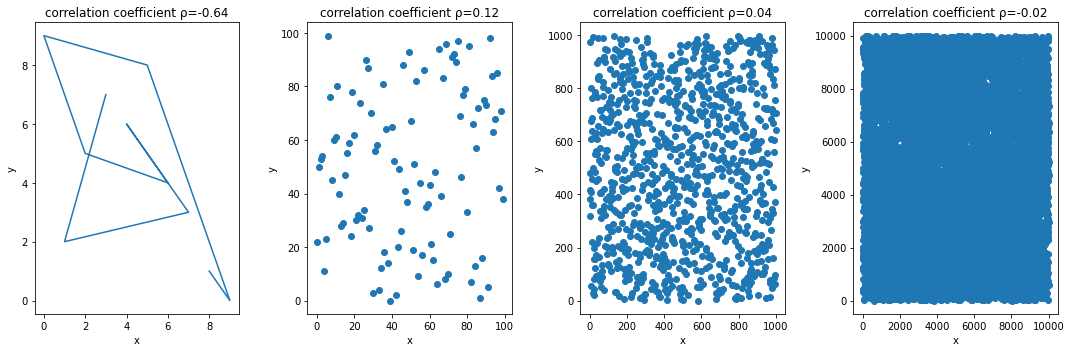

In [12]:
def get_spearman_correlation(n):
    rng = np.random.default_rng(seed=1234)
    x = rng.permutation(np.arange(n))
    y = rng.permutation(np.arange(n))
    correlation, pvalue = spearmanr(x, y)
    return x, y, correlation

fig = plt.figure(figsize=[15, 5])

x, y, correlation = get_spearman_correlation(10)
ax1 = fig.add_subplot(1, 4, 1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("correlation coefficient ρ={:.2f}".format(correlation))
ax1.plot(x, y)

x, y, correlation = get_spearman_correlation(100)
ax2 = fig.add_subplot(1, 4, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("correlation coefficient ρ={:.2f}".format(correlation))
ax2.scatter(x, y)

x, y, correlation = get_spearman_correlation(1000)
ax3 = fig.add_subplot(1, 4, 3)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("correlation coefficient ρ={:.2f}".format(correlation))
ax3.scatter(x, y)

x, y, correlation = get_spearman_correlation(10000)
ax4 = fig.add_subplot(1, 4, 4)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("correlation coefficient ρ={:.2f}".format(correlation))
ax4.scatter(x, y)

plt.tight_layout()
plt.show()

plt.close()

### ケンドールの順位相関分析

## 因果分析

# 参考文献

* [データを使う力を高める＝相関関係と因果関係編【第5回】](https://dcross.impress.co.jp/docs/column/column20200722/001805.html)
* [NECの最先端技術 データから「なぜ」を見出す因果分析技術](https://jpn.nec.com/rd/technologies/202008/index.html)
* [正準相関分析(Canonical Correlation Analysis：CCA)](https://blog.octopt.com/canonical-correlation-analysis/)
* [データ分析手法3 相関分析](http://web.tku.ac.jp/~htajima/lecture/mktg_research/correlation.pdf)
* [相関分析1](https://www.koka.ac.jp/morigiwa/sjs/les10801.htm)
* [Pearsonの積率相関係数](https://www.jmp.com/support/help/ja/15.2/index.shtml#page/jmp/pearson-product-moment-correlation.shtml)
* [「21世紀の相関係数」を超える(２)](https://techblog.nhn-techorus.com/archives/8272)
* [スピアマン順位相関係数の無相関検定](https://istat.co.jp/sk_commentary/correlation-test/Spearmans-Test)
* [スピアマンの順位相関係数](http://www.tamagaki.com/math/Statistics609.html)
* [ピアソン，スピアマン，ケンドールの相関係数について](https://stats.biopapyrus.jp/stats/correlation.html)
* [【統計学とRの備忘録】様々な相関係数の概要と公式・Rの関数](http://by-oneself.com/r_for_baseball12/)
* [4乗の和，べき乗の和の公式](https://manabitimes.jp/math/645)
* [スピアマンの順位相関係数の導出過程を教えてください](https://okwave.jp/qa/q8939619.html)
* [総和記号 Σ シグマの計算法と5つの公式。等差数列・等比数列を分かりやすく考えるコツ](https://atarimae.biz/archives/10252)